In [1]:
%%html
<style>
@font-face {
    font-family: Vazir;
    src: url('Vazir.eot');
    src: url('Vazir.eot?#iefix') format('embedded-opentype'),
         url('Vazir.woff2') format('woff2'),
         url('Vazir.woff') format('woff'),
         url('Vazir.ttf') format('truetype');
    font-weight: normal;
    font-style: normal;
}
.farsi{
    font-family:Vazir;
    direction: rtl;
    #font-size:26px;
}
.center{
    text-align: center;
}
.justify{
    text-align: justify;
}
.blue{
    color: blue;
}
</style>

# <div class="farsi center">بسم الله الرحمن الرحیم</div>

## <div class = "farsi center blue">خواندن از فایل ها</div>

In [2]:
import pandas as pd
import numpy as np

MNIST_LENGTH = 28
train_label = pd.read_csv('MNIST/train_label.csv',header=None)
train_data  = pd.read_csv('MNIST/train_data.csv' ,header=None)
test_label  = pd.read_csv('MNIST/test_label.csv' ,header=None)
test_data   = pd.read_csv('MNIST/test_data.csv'  ,header=None)
np_test_label = np.array(test_label[0].values)

## <div class = "farsi center blue">توابع اولیه</div>

In [3]:
from PIL import Image
from matplotlib.pyplot import imshow
from sklearn.externals.six import StringIO  
from IPython.display import Image as IPyImage
from IPython.display import display, HTML
import pydotplus
import matplotlib.pylab as plt

def vector_to_arr(img_vec):
    return np.array([img_vec[i*MNIST_LENGTH:(i+1)*MNIST_LENGTH]for i in range(MNIST_LENGTH)]).T.tolist()
def print_img(img_arr):
    img = Image.new( 'RGB', (MNIST_LENGTH,MNIST_LENGTH))
    pixels = img.load()
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            pixels[i,j] = (img_arr[i][j],img_arr[i][j],img_arr[i][j])
    imshow(np.asarray(img))
def calc_grade(perdicts):
    np_perdicts = np.array(perdicts)
    return np.count_nonzero(np_perdicts==np_test_label)/len(np_test_label)
def print_tree(inp):
    dot_data = StringIO()
    tree.export_graphviz(inp, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()
def draw_plot(inp):
    lists = inp.items()
    x, y = zip(*lists)
    plt.plot(x, y)
    plt.xticks(np.arange(min(inp),max(inp), 1)) 
    plt.show()

## <div class = "farsi center blue">پرینت یکان شماره دانشجویی</div>

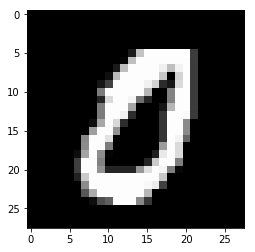

In [4]:
i = 10
print_img(vector_to_arr(train_data.values[i]))

# <div class = "center blue">K-Nearest Neighbors</div>

<div class="farsi justify">
    ۱- در این الگوریتم یک فضای n بعدی ساخته می شود که در آن هر داده معادل یک نقطه در این فضا می شود. برای  بررسی داده جدید  k نقطه نزدیکتر به آن انتخاب می شوند و بین آن ها بررسی میشود که بیشترین جواب مشترک بین آنها چیست و این جواب به عنوان خروجی داده می شود.
<br/>
    ۲-
</div>

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(18)
knc.fit(train_data.values,train_label[0].values)
perdicted = knc.predict(test_data.values)
print(calc_grade(perdicted))

0.89


<div class="farsi justify">
    ۳-
</div>

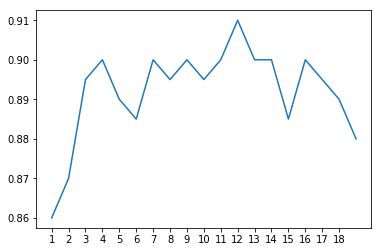

The optimal point is:12


In [6]:
results = {}
for i in range(1,20):
    temp = KNeighborsClassifier(i)
    temp.fit(train_data.values,train_label[0].values)
    results[i] = calc_grade(temp.predict(test_data.values))
draw_plot(results)
print("The optimal point is:"+str(max(results.items(), key=lambda x:x[1])[0]))

<div class="farsi justify">
    ۴-
    <br/>
    ۵-
</div>

In [7]:
neighbors = knc.kneighbors_graph([test_data.values[50]]).toarray().tolist()[0]
nears = []
for i in range(len(neighbors)):
    if neighbors[i] > 0:
        nears.append(train_label.values[i][0])
print(nears)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 8]


<div class="farsi justify">
    ۶-
</div>

# <div class = "center blue">Decision Tree</div>

<div class="farsi justify">
    ۷-
    <br/>
    ۸-
</div>

In [8]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth = 3)
dtc.fit(train_data.values,train_label[0].values)
perdicted = dtc.predict(test_data.values)
print(calc_grade(perdicted))

0.35


<div class="farsi justify">
    ۱۰-
</div>

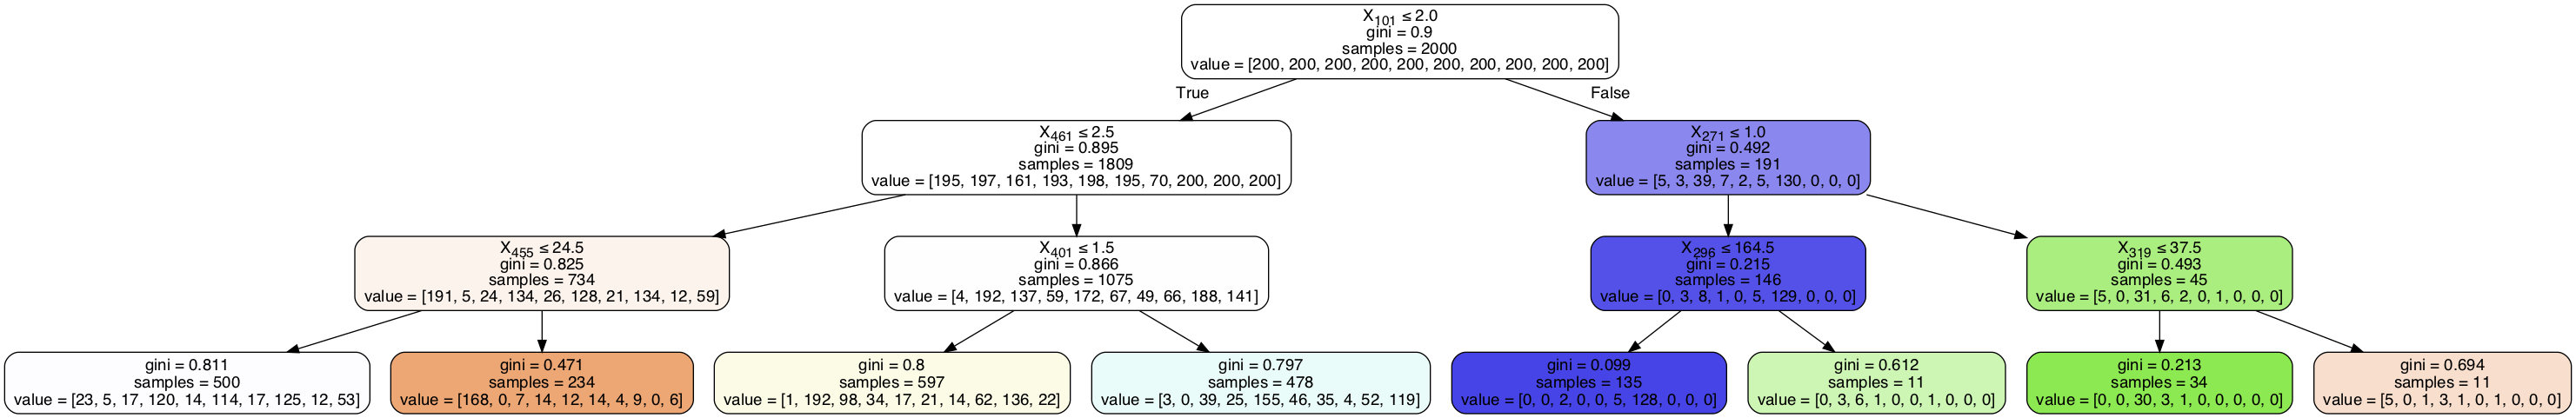

In [9]:
IPyImage(print_tree(dtc))

<div class="farsi justify">
    ۱۱-
</div>

# <div class = "center blue">Random Forest</div>

<div class="farsi justify">
    ۱۲-
    <br/>
    ۱۳-
</div>

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth = 3)
rfc.fit(train_data.values,train_label[0].values)
perdicted = rfc.predict(test_data.values)
print(calc_grade(perdicted))

0.685


<div class="farsi justify">
    ۱۴-
    <br/>
    ۱۵-
    <br/>
    ۱۶-
</div>

# <div class = "center blue">Regresion Logistica</div>

<div class="farsi justify">
    ۱۷-
    <br/>
    ۱۸-
</div>

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(train_data.values,train_label[0].values)
perdicted = lr.predict(test_data.values)
print(calc_grade(perdicted))

0.785


# <div class = "center blue">K-Means</div>

<div class="farsi justify">
    ۱۹-
    <br/>
    ۱۳-
</div>

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km.fit(train_data.values,train_label[0].values)
perdicted = km.predict(test_data.values)
print(calc_grade(perdicted))

0.07


# <div class = "farsi center blue">جمع بندی</div>